# **Reto: Ingeniería de características**


# Descripción de la situación problema

Para las organizaciones es muy importante mantener a aquellos empleados que tengan muchos años de servicio, debido a los conocimientos y a la experiencia que han ganado con el paso del tiempo mencionado. Es por eso que muchas empresas u organizaciones buscan predecir una posible deserción por parte de aquellos empleados que tengan muchos años de servicio y sean propensos a renunciar.
Usando los métodos que nos ofrece la ciencia de datos podemos hacer una predicción de las posibles renuncias y con los resultados otros departamentos de la organización puede beneficiar a estos empleados y mantenerlos con ellos más tiempo.

In [130]:
!pip install factor_analyzer

In [131]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime as dt
# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
# Procesado y modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
# Configuracion warnings
import warnings
warnings.filterwarnings('ignore')

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
employees = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science and AI/Quinta sesión/employees.csv')
employees

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,0.4162


In [134]:
employees.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'Attrition_rate'],
      dtype='object')

# Descripción detallada de la información y de las variables del dataset

**Variables:**
* 'Employee_ID': El identificador de los empleados.
* 'Gender': El género de los empleados.
* 'Age': La edad de los empleados.
* 'Education_Level': El nivel educativo de los empleados.
* 'Relationship_Status': El estado civil de los empleados.
* 'Hometown': La ciudad de donde provienen.
* 'Unit': El área en la que trabajan.
* 'Decision_skill_possess': Su habilidad de toma de decisiones.
* 'Time_of_service': Cuánto tiempo (años) lleva el empleado en la organización.   
* 'Time_since_promotion': Cuánto tiempo ha pasado desde su última promoción.
* 'growth_rate': Índice de crecimiento del empleado.
* 'Travel_Rate': El índice de traslado que tienen que realizar los empleados.
* 'Post_Level': El nivel de dificultad de las tareas de los empleados.          
* 'Pay_Scale': La escala de pago de los empleados.
* 'Compensation_and_Benefits': Las diferentes compensaciones y beneficios que tienen los empleados.
* 'Work_Life_balance': El índice de balance entre trabajo y vida personal.
* 'Attrition_rate': El índice de deserción de los empleados.



In [135]:
# Tamaño del dataset
employees.shape

(7000, 17)

In [136]:
# Tipos de datos que contienen las variables
employees.dtypes

,0
Employee_ID,object
Gender,object
Age,float64
Education_Level,int64
Relationship_Status,object
Hometown,object
Unit,object
Decision_skill_possess,object
Time_of_service,float64
Time_since_promotion,int64


In [137]:
# Encontrar valores únicos en las variables
employees.nunique()

,0
Employee_ID,7000
Gender,2
Age,47
Education_Level,5
Relationship_Status,2
Hometown,5
Unit,12
Decision_skill_possess,4
Time_of_service,44
Time_since_promotion,5


In [138]:
# Estadísticas descriptivas para los valores numéricos
stats = employees.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0,27.0000,37.00000,52.000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0,3.0000,3.00000,4.000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0,5.0000,10.00000,21.000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0,1.0000,2.00000,3.000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0,33.0000,47.00000,61.000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0,0.0000,1.00000,1.000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0,2.0000,3.00000,3.000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0,5.0000,6.00000,8.000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0,1.0000,2.00000,3.000,5.0000
Attrition_rate,7000.0,0.189376,0.185753,0.0,0.0704,0.14265,0.235,0.9959


In [139]:
# Estadísticas descriptivas para valores no numéricos
employees.describe(include = 'object')

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,7000,7000,7000,7000,7000,7000,7000
unique,7000,2,2,5,12,4,5
top,EID_1640,F,Married,Lebanon,IT,Conceptual,type2
freq,1,4114,4520,2070,1394,1756,3945


# Encontrar valores faltantes y tratarlos

In [140]:
# Obtenemos la matriz de valores faltantes
employees.isna()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [141]:
# Encontramos la cantidad total de valores faltantes en cada columna
employees.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0


In [142]:
# Inputar los valores faltantes de la columna 'Age' con la mediana, porque a pesar de que la variable es numérica, en ninguno de los datos aparece un valor con decimales
employees['Age'].fillna(employees['Age'].median(), inplace = True)

In [143]:
# Inputar los valores faltantes de la columna 'Time_of_service' con la mediana, porque a pesar de que la variable es numérica, en ninguno de los datos aparece un valor con decimales
employees['Time_of_service'].fillna(employees['Time_of_service']. median(), inplace = True)

In [144]:
# Inputar los valores faltantes de la columna 'Pay_Scale' con la mediana, porque a pesar de que la variable es numérica, en ninguno de los datos aparece un valor con decimales
employees['Pay_Scale'].fillna(employees['Pay_Scale'].median(), inplace = True)

In [145]:
# Inputar los valores faltantes de la columna 'Work_Life_balance' con la mediana, porque a pesar de que la variable es numérica, en ninguno de los datos aparece un valor con decimales
employees['Work_Life_balance'].fillna(employees['Work_Life_balance'].median(), inplace = True)

In [146]:
# Verificamos que ya no hay valores faltantes en ninguna de las columnas
# Usamos la media en todas las columnas debido a que son datos numéricos, pero ninguno de los datos contiene valores decimales
# ademas en todos los casos la mediana se acerca bastante a la media
employees.isnull().sum()

,0
Employee_ID,0
Gender,0
Age,0
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,0
Time_since_promotion,0


# Encontrar valores atípicos y tratarlos

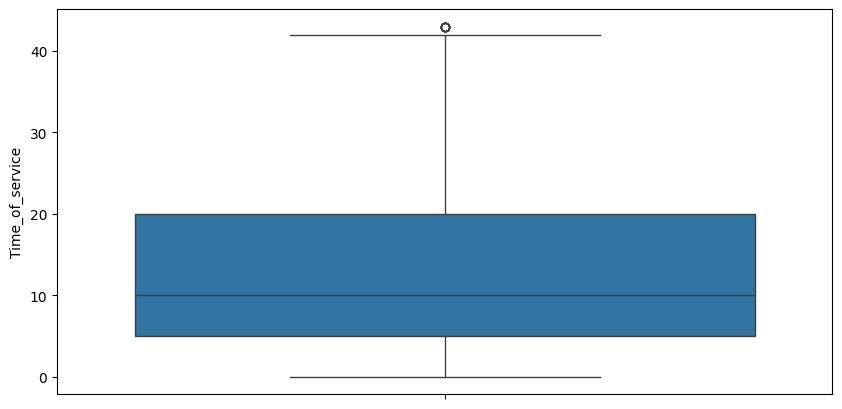

In [147]:
# Encontrar valores atípicos en un boxplot en la columna 'Time_of_service'
plt.figure(figsize = (10, 5))
sns.boxplot(employees['Time_of_service'])
plt.show()

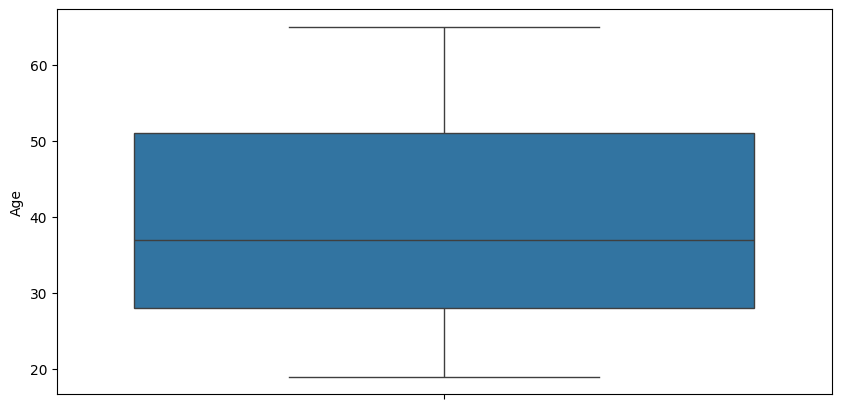

In [148]:
# Encontrar valores atípicos en un boxplot en la columna 'Age'
plt.figure(figsize = (10, 5))
sns.boxplot(employees['Age'])
plt.show()

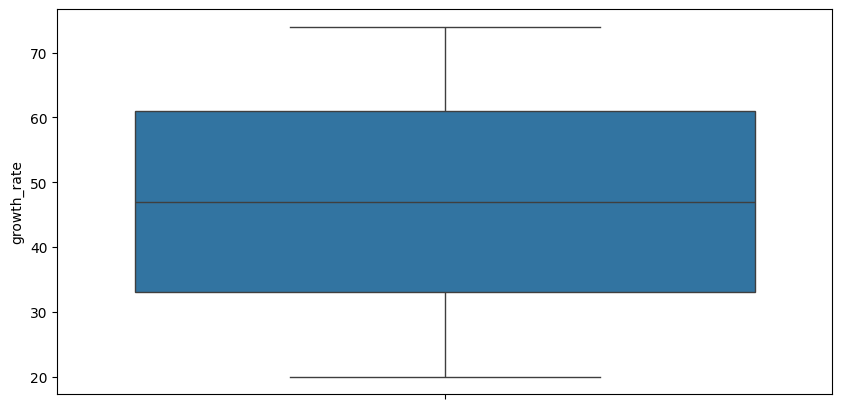

In [149]:
# Encontrar valores atípicos en un boxplot en la columna 'growth_rate'
plt.figure(figsize = (10, 5))
sns.boxplot(employees['growth_rate'])
plt.show()

De todas las variables en donde el valor máximo se aleja mucho de la media o donde pareciera haber valores atípicos, sólo podemos notar que en la columna de 'Time_of_service' es la que presenta un outlier o un valor atípico.
Debido a que son pocos valores entre todos los registros, solamente eliminaremos ese registro, debido a que perdemos mucha información usando otraas técnicas.

In [150]:
# Eliminar el registro con el valor atípico
employees = employees.drop(employees[employees['Time_of_service'] == 43].index)

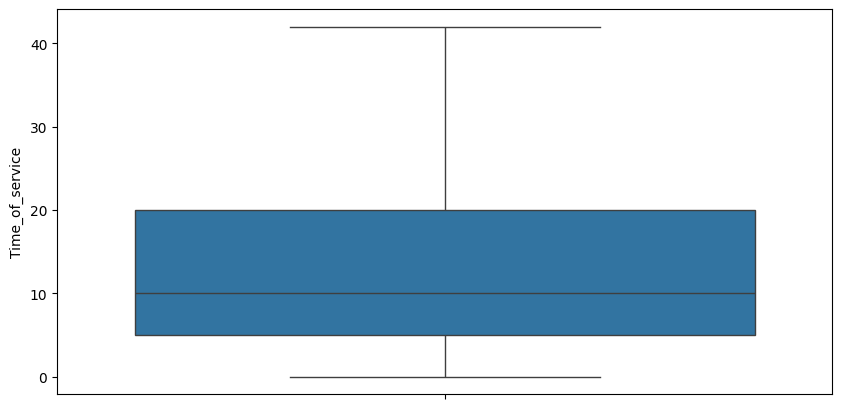

In [151]:
plt.figure(figsize = (10, 5))
sns.boxplot(employees['Time_of_service'])
plt.show()

Notamos que ya no encontramos valores atípicos en la columna

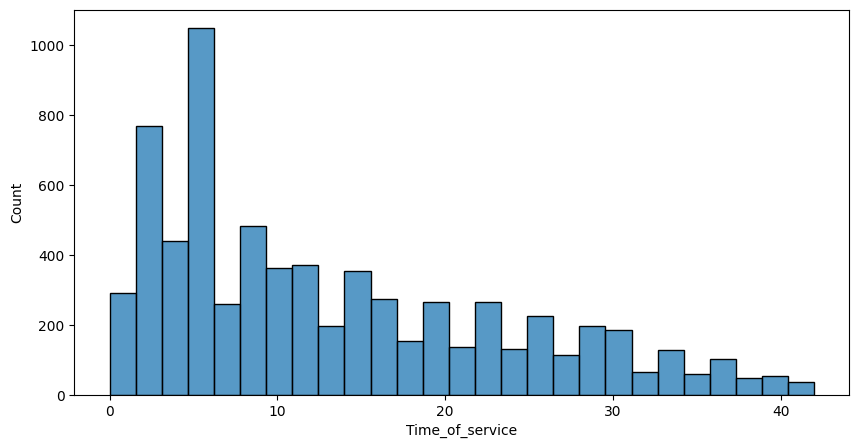

In [152]:
# Histograma
plt.figure(figsize = (10, 5))
sns.histplot(employees['Time_of_service'])
plt.show()

Identificar y enunciar variables que requieran transformaciones como One Hot Encoding

In [153]:
# Detectar las variables categóricas que requieran utilizar One Hot Encoding
employees.select_dtypes(include = ['object'])

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...
6995,EID_16328,F,Married,Franklin,Operarions,Behavioral,type3
6996,EID_8387,F,Married,Lebanon,R&D,Analytical,type3
6997,EID_8077,F,Single,Springfield,IT,Directive,type2
6998,EID_19597,F,Married,Washington,Sales,Behavioral,type0


In [154]:
# Get the number of unique values for each object (categorical) column
object_cols = employees.select_dtypes(include = ['object']).columns
employees[object_cols].nunique()

,0
Employee_ID,6992
Gender,2
Relationship_Status,2
Hometown,5
Unit,12
Decision_skill_possess,4
Compensation_and_Benefits,5


In [155]:
enc = OneHotEncoder(handle_unknown = 'ignore')

enc.fit(employees[['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']])

encoded_features = enc.transform(employees[['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']]).toarray()

encoded_employees = pd.DataFrame(encoded_features, columns = enc.get_feature_names_out(['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']))

employees = pd.concat([employees, encoded_employees], axis = 1)

employees = employees.drop(['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits'], axis = 1)

In [158]:
employees.shape

(7000, 39)

Las columnas que dividen los datos en intervalos son 'Education_Level', ya que va desde el nivel 1 hasta el nivel 5, y esos son los 5 intervalos en las que se dividen los datos de esa columna.
También la columna 'Travel_Rate', dividiendo sus categorías en 3 valores posibles, 'Post_Level' en 5.
La columna 'Compensation_and_Benefits' de igual forma lo hace, incluso siendo una columna categórica.

# Reducción de dimensionalidad

In [160]:
employees.dtypes

,0
Employee_ID,object
Gender,object
Age,float64
Education_Level,float64
Relationship_Status,object
Time_of_service,float64
Time_since_promotion,float64
growth_rate,float64
Travel_Rate,float64
Post_Level,float64


# PCA

In [167]:
columns = employees.select_dtypes(include = ['object']).columns
categoricas = pd.DataFrame(employees, columns = columns)
numericas = employees.drop(columns, axis = 1)

scaler = StandardScaler()
numericas_escaladas = scaler.fit_transform(numericas)
numericas_escaladas

array([[ 0.1940998 ,  0.76234472, -0.90779714, ...,  0.87986874,
        -0.71836279, -0.23058764],
       [-1.17024671, -0.17675223, -0.80998961, ...,  0.87986874,
        -0.71836279, -0.23058764],
       [ 1.40685225, -0.17675223,  1.3417761 , ...,  0.87986874,
        -0.71836279, -0.23058764],
       ...,
       [        nan,         nan,         nan, ..., -1.13653317,
         1.39205428, -0.23058764],
       [        nan,         nan,         nan, ..., -1.13653317,
        -0.71836279, -0.23058764],
       [        nan,         nan,         nan, ..., -1.13653317,
         1.39205428, -0.23058764]])

In [168]:
numericas = pd.DataFrame(numericas_escaladas, columns = numericas.columns)
numericas

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0.194100,0.762345,-0.907797,1.420534,-0.891523,0.281571,-1.544939,0.483410,0.546707,-0.028573,...,-0.14501,-0.578231,-0.574488,1.728096,-0.578011,-0.164857,-0.139250,0.879869,-0.718363,-0.230588
1,-1.170247,-0.176752,-0.809990,1.420534,-0.701163,-1.261332,0.173380,-0.002572,1.438167,-0.658725,...,-0.14501,1.729412,-0.574488,-0.578671,-0.578011,-0.164857,-0.139250,0.879869,-0.718363,-0.230588
2,1.406852,-0.176752,1.341776,0.550494,0.250637,-1.261332,-0.685780,0.969391,-1.236212,-0.561323,...,-0.14501,-0.578231,-0.574488,1.728096,-0.578011,-0.164857,-0.139250,0.879869,-0.718363,-0.230588
3,-1.018653,-0.176752,-0.907797,0.550494,0.567903,0.281571,0.173380,0.969391,-1.236212,-0.659802,...,-0.14501,-0.578231,1.740681,-0.578671,-0.578011,-0.164857,-0.139250,0.879869,-0.718363,-0.230588
4,-0.639668,-2.054946,-0.809990,1.420534,0.948623,0.281571,0.173380,-1.946497,0.546707,-0.036106,...,-0.14501,-0.578231,-0.574488,1.728096,-0.578011,-0.164857,-0.139250,-1.136533,1.392054,-0.230588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14501,-0.578231,-0.574488,-0.578671,1.730071,-0.164857,7.181325,-1.136533,-0.718363,-0.230588
6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14501,-0.578231,-0.574488,-0.578671,1.730071,-0.164857,-0.139250,-1.136533,1.392054,-0.230588
6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14501,-0.578231,-0.574488,1.728096,-0.578011,-0.164857,-0.139250,-1.136533,1.392054,-0.230588
6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14501,-0.578231,-0.574488,-0.578671,1.730071,6.065855,-0.139250,-1.136533,-0.718363,-0.230588


In [170]:
numericas.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
count,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,...,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03,6.992000e+03
mean,-1.885093e-16,1.717416e-16,2.438934e-17,-1.880012e-16,-7.723291e-17,4.776246e-17,3.201101e-17,-3.505967e-17,-1.971472e-16,4.217323e-17,...,-3.099478e-17,-3.251912e-17,-1.321089e-17,6.097335e-17,4.471379e-17,2.083256e-17,1.930823e-17,-5.589223e-17,3.302723e-17,-4.573001e-18
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,...,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.549232e+00,-2.054946e+00,-1.299027e+00,-2.059625e+00,-1.716416e+00,-1.261332e+00,-1.544939e+00,-2.432479e+00,-1.236212e+00,-1.019274e+00,...,-1.450105e-01,-5.782310e-01,-5.744877e-01,-5.786714e-01,-5.780109e-01,-1.648572e-01,-1.392501e-01,-1.136533e+00,-7.183628e-01,-2.305876e-01
25%,-8.670586e-01,-1.767522e-01,-8.099896e-01,-1.189585e+00,-8.915226e-01,-1.261332e+00,-6.857796e-01,-4.885531e-01,-1.236212e+00,-6.404288e-01,...,-1.450105e-01,-5.782310e-01,-5.744877e-01,-5.786714e-01,-5.780109e-01,-1.648572e-01,-1.392501e-01,-1.136533e+00,-7.183628e-01,-2.305876e-01
50%,-1.848853e-01,-1.767522e-01,-3.209519e-01,-3.195455e-01,-3.176295e-03,2.815709e-01,1.733802e-01,-2.571698e-03,-3.447521e-01,-2.518974e-01,...,-1.450105e-01,-5.782310e-01,-5.744877e-01,-5.786714e-01,-5.780109e-01,-1.648572e-01,-1.392501e-01,8.798687e-01,-7.183628e-01,-2.305876e-01
75%,8.762731e-01,7.623447e-01,6.571234e-01,5.504943e-01,8.851700e-01,2.815709e-01,1.733802e-01,9.693910e-01,5.467074e-01,2.453367e-01,...,-1.450105e-01,1.729412e+00,-5.744877e-01,1.728096e+00,1.730071e+00,-1.648572e-01,-1.392501e-01,8.798687e-01,1.392054e+00,-2.305876e-01
max,1.937431e+00,1.701442e+00,2.808889e+00,1.420534e+00,1.710063e+00,1.824474e+00,1.891700e+00,1.941354e+00,2.329626e+00,4.339984e+00,...,6.896054e+00,1.729412e+00,1.740681e+00,1.728096e+00,1.730071e+00,6.065855e+00,7.181325e+00,8.798687e-01,1.392054e+00,4.336746e+00


In [171]:
numericas = numericas.round(2)

In [172]:
numericas

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0.19,0.76,-0.91,1.42,-0.89,0.28,-1.54,0.48,0.55,-0.03,...,-0.15,-0.58,-0.57,1.73,-0.58,-0.16,-0.14,0.88,-0.72,-0.23
1,-1.17,-0.18,-0.81,1.42,-0.70,-1.26,0.17,-0.00,1.44,-0.66,...,-0.15,1.73,-0.57,-0.58,-0.58,-0.16,-0.14,0.88,-0.72,-0.23
2,1.41,-0.18,1.34,0.55,0.25,-1.26,-0.69,0.97,-1.24,-0.56,...,-0.15,-0.58,-0.57,1.73,-0.58,-0.16,-0.14,0.88,-0.72,-0.23
3,-1.02,-0.18,-0.91,0.55,0.57,0.28,0.17,0.97,-1.24,-0.66,...,-0.15,-0.58,1.74,-0.58,-0.58,-0.16,-0.14,0.88,-0.72,-0.23
4,-0.64,-2.05,-0.81,1.42,0.95,0.28,0.17,-1.95,0.55,-0.04,...,-0.15,-0.58,-0.57,1.73,-0.58,-0.16,-0.14,-1.14,1.39,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.15,-0.58,-0.57,-0.58,1.73,-0.16,7.18,-1.14,-0.72,-0.23
6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.15,-0.58,-0.57,-0.58,1.73,-0.16,-0.14,-1.14,1.39,-0.23
6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.15,-0.58,-0.57,1.73,-0.58,-0.16,-0.14,-1.14,1.39,-0.23
6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.15,-0.58,-0.57,-0.58,1.73,6.07,-0.14,-1.14,-0.72,-0.23


In [175]:
numericas = numericas.fillna(numericas.mean())

pca_model = PCA(n_components=36)
pca_model.fit(numericas)

PCA(n_components=36)

In [176]:
pd.DataFrame(
    data = pca_model.components_,
    columns = numericas.columns,
)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate,...,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,6.473239e-01,-8.710252e-03,6.447976e-01,1.897866e-01,-6.385219e-03,1.538679e-02,8.427304e-05,2.322367e-02,-6.603256e-03,-2.661718e-02,...,0.015746,-0.025986,0.043131,0.018916,-0.036060,0.000148,0.034873,-0.247596,0.234570,0.030226
1,2.290653e-01,-1.671946e-02,2.363655e-01,7.647109e-02,1.174158e-02,-2.781299e-02,6.491740e-04,-7.625907e-03,8.962246e-03,1.124076e-02,...,0.005253,-0.022714,0.043617,-0.003804,-0.017100,-0.065317,-0.041901,0.675942,-0.632333,-0.085606
2,2.347657e-03,1.755886e-02,7.100611e-03,-3.222455e-02,-5.834662e-02,6.183999e-03,5.643578e-02,5.071349e-02,-1.839447e-02,1.281625e-02,...,-0.017663,-0.125624,0.385430,-0.129502,-0.130305,0.041969,0.041096,-0.003784,-0.053087,0.067099
3,1.170796e-02,1.257526e-02,7.884334e-03,-2.919252e-02,2.309836e-02,-3.183961e-03,-4.746874e-02,1.695589e-02,-4.642492e-03,-1.512378e-02,...,-0.012382,-0.630686,0.031056,-0.068189,0.667819,0.006255,-0.034695,0.005190,0.050799,-0.104693
4,-2.003044e-02,-5.557088e-02,-1.586790e-02,-7.476622e-02,-2.865995e-02,6.227469e-02,2.205645e-02,1.884120e-02,1.988896e-02,-6.985649e-02,...,-0.082783,-0.456701,-0.024947,0.798245,-0.316597,-0.018569,0.008876,0.008614,-0.003033,-0.004839
5,-4.262677e-02,-7.772546e-03,-3.862372e-02,1.278244e-03,-3.002220e-02,-5.439053e-02,-1.574938e-02,-6.929910e-02,-1.746478e-02,2.118019e-02,...,0.002733,-0.206321,0.716950,-0.221291,-0.289338,-0.030549,-0.066790,-0.021852,0.055755,-0.007214
6,6.621677e-04,1.732488e-02,8.755094e-04,-2.711548e-02,-4.771787e-02,5.051030e-03,3.446723e-02,4.553532e-02,-1.253059e-01,-1.774749e-02,...,0.025498,0.193387,-0.100056,0.107183,-0.200514,0.099416,0.035584,-0.043618,0.007201,-0.012057
7,3.381142e-03,1.068794e-01,-4.970671e-03,-1.230272e-02,1.362312e-01,-2.975132e-02,-8.897618e-03,1.506001e-02,-7.149731e-02,3.189411e-02,...,0.012380,-0.040663,0.134188,0.018590,-0.112114,-0.053223,-0.027640,0.042896,0.058341,-0.167109
8,-1.954276e-02,7.429263e-02,-8.484317e-03,5.700163e-02,1.530376e-02,-5.814769e-02,-5.538539e-02,-4.484952e-02,-2.228376e-03,9.037328e-04,...,-0.012172,0.028061,0.113125,-0.003960,-0.137226,0.043575,0.044128,-0.030455,-0.012463,0.036379
9,-2.096972e-02,1.134502e-02,-2.339232e-02,4.050919e-02,4.493287e-02,-5.012293e-02,-1.327248e-02,-5.881989e-02,9.694669e-03,-4.568490e-03,...,-0.028339,-0.082452,0.070791,0.029020,-0.017358,-0.007052,-0.201640,0.017579,0.086034,-0.095048


In [177]:
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

[0.05410149 0.10474819 0.14403142 0.1817251  0.21919748 0.25593044
 0.29245776 0.32685729 0.36101056 0.39383922 0.42581633 0.45755081
 0.48857185 0.51914773 0.54945041 0.57941548 0.60913313 0.6385875
 0.66791421 0.69677782 0.72553899 0.75403496 0.78220256 0.81003634
 0.83765485 0.86522398 0.89243019 0.91926875 0.94539405 0.97120039
 0.99669354 1.         1.         1.         1.         1.        ]


In [178]:
print(pca_model.explained_variance_ratio_)

[5.41014873e-02 5.06467047e-02 3.92832324e-02 3.76936795e-02
 3.74723779e-02 3.67329611e-02 3.65273140e-02 3.43995330e-02
 3.41532691e-02 3.28286626e-02 3.19771053e-02 3.17344823e-02
 3.10210422e-02 3.05758772e-02 3.03026850e-02 2.99650698e-02
 2.97176416e-02 2.94543791e-02 2.93267024e-02 2.88636120e-02
 2.87611677e-02 2.84959722e-02 2.81676057e-02 2.78337739e-02
 2.76185140e-02 2.75691304e-02 2.72062089e-02 2.68385602e-02
 2.61252974e-02 2.58063395e-02 2.54931540e-02 3.30645756e-03
 1.21365376e-16 9.88319186e-17 1.33761932e-17 0.00000000e+00]


In [180]:
proyecciones = np.dot(pca_model.components_, numericas.T)
proyecciones = pd.DataFrame(proyecciones.T)
proyecciones

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.541506,1.173582,-1.107309,0.432919,1.674514,-0.250846,1.351544,-1.079793,2.302466,0.923976,...,-0.618022,0.244929,1.221512,0.430500,1.724972,0.797931,-0.000514,-0.000875,0.000799,-0.002572
1,-1.406060,0.747049,-1.447376,-2.255114,-0.944348,0.313501,-0.995178,-0.684176,-1.446979,1.364387,...,-0.973973,-0.366444,0.776236,-1.680908,0.533961,-0.257917,-0.000514,-0.000875,0.000799,-0.002572
2,1.526248,1.697656,-0.439813,0.116646,1.301449,-0.709039,0.455765,1.082518,-0.726156,-0.095651,...,-1.925062,-0.405783,-0.700266,0.289653,0.478980,0.068716,-0.000514,-0.000875,0.000799,-0.002572
3,-1.468155,0.673317,2.500782,-0.578265,-0.124913,0.687852,-0.398316,0.545872,0.111378,0.164192,...,1.528919,-0.731447,0.232397,-0.330638,1.130916,-0.081484,-0.000514,-0.000875,0.000799,-0.002572
4,0.009369,-1.765820,-1.753617,-0.881452,1.974943,0.463160,-1.182284,-0.475919,-1.609307,1.835769,...,-0.421595,-0.600241,-0.494338,-1.673209,0.507696,0.085800,-0.000514,-0.000875,0.000799,-0.002572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.274047,-0.660604,1.262161,1.266947,-0.676311,-2.219937,-0.754420,-0.825535,1.947155,-0.532815,...,0.562825,-0.464267,-1.974244,-0.974759,2.284591,0.050969,-0.000514,-0.000875,0.000799,-0.002572
6996,0.428134,-1.689480,-0.762011,1.944041,-0.585542,0.004066,1.119494,-0.484431,-0.186398,-0.100863,...,0.309058,0.362934,-0.178955,-0.407935,0.175443,-0.007198,-0.000514,-0.000875,0.000799,-0.002572
6997,0.660360,-1.656362,1.019286,-0.425159,1.835449,-0.979516,0.204293,-0.171066,-1.455998,2.136668,...,-0.328618,0.157117,0.022024,0.052250,0.131747,-0.017820,-0.000514,-0.000875,0.000799,-0.002572
6998,-0.258558,-0.878924,1.695979,1.553510,-0.826438,-1.376500,-0.455213,-1.062130,-0.056366,-0.080009,...,0.896964,-0.336638,-0.892493,-0.617386,-1.676529,0.027040,-0.000514,-0.000875,0.000799,-0.002572


In [183]:
conjunto_1 = proyecciones[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
conjunto_1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.541506,1.173582,-1.107309,0.432919,1.674514,-0.250846,1.351544,-1.079793,2.302466,0.923976,...,-0.566372,-0.438364,-0.008846,-0.277978,-0.618022,0.244929,1.221512,0.430500,1.724972,0.797931
1,-1.406060,0.747049,-1.447376,-2.255114,-0.944348,0.313501,-0.995178,-0.684176,-1.446979,1.364387,...,-0.672628,-0.492790,-0.259332,-0.646380,-0.973973,-0.366444,0.776236,-1.680908,0.533961,-0.257917
2,1.526248,1.697656,-0.439813,0.116646,1.301449,-0.709039,0.455765,1.082518,-0.726156,-0.095651,...,1.288486,1.492012,1.347387,-0.083377,-1.925062,-0.405783,-0.700266,0.289653,0.478980,0.068716
3,-1.468155,0.673317,2.500782,-0.578265,-0.124913,0.687852,-0.398316,0.545872,0.111378,0.164192,...,-0.821992,-0.025403,-0.495674,1.415255,1.528919,-0.731447,0.232397,-0.330638,1.130916,-0.081484
4,0.009369,-1.765820,-1.753617,-0.881452,1.974943,0.463160,-1.182284,-0.475919,-1.609307,1.835769,...,0.435795,-0.288354,1.017023,0.741191,-0.421595,-0.600241,-0.494338,-1.673209,0.507696,0.085800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.274047,-0.660604,1.262161,1.266947,-0.676311,-2.219937,-0.754420,-0.825535,1.947155,-0.532815,...,2.331361,-1.215299,1.082859,-2.521936,0.562825,-0.464267,-1.974244,-0.974759,2.284591,0.050969
6996,0.428134,-1.689480,-0.762011,1.944041,-0.585542,0.004066,1.119494,-0.484431,-0.186398,-0.100863,...,0.063959,0.399307,-0.368676,0.560412,0.309058,0.362934,-0.178955,-0.407935,0.175443,-0.007198
6997,0.660360,-1.656362,1.019286,-0.425159,1.835449,-0.979516,0.204293,-0.171066,-1.455998,2.136668,...,-0.057217,-0.178103,0.361948,-0.306235,-0.328618,0.157117,0.022024,0.052250,0.131747,-0.017820
6998,-0.258558,-0.878924,1.695979,1.553510,-0.826438,-1.376500,-0.455213,-1.062130,-0.056366,-0.080009,...,1.512445,0.789718,-0.194693,0.943293,0.896964,-0.336638,-0.892493,-0.617386,-1.676529,0.027040


# FA

In [185]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(numericas)
chi_square_value, p_value

(np.float64(945985.3719988253), np.float64(0.0))

In [186]:
fa = FactorAnalyzer()
fa.fit(numericas)
ev, v = fa.get_eigenvalues()
ev

array([ 1.94789845e+00,  1.82119759e+00,  1.41743539e+00,  1.35531981e+00,
        1.34630373e+00,  1.32599121e+00,  1.31468301e+00,  1.23856721e+00,
        1.23133477e+00,  1.18149704e+00,  1.15122210e+00,  1.14217716e+00,
        1.11653310e+00,  1.10110384e+00,  1.09085466e+00,  1.07757560e+00,
        1.06855337e+00,  1.05935064e+00,  1.05553203e+00,  1.03990496e+00,
        1.03451743e+00,  1.02490093e+00,  1.01391965e+00,  1.00196416e+00,
        9.93715119e-01,  9.92718862e-01,  9.79869672e-01,  9.67941944e-01,
        9.40078216e-01,  9.29862847e-01,  9.18406006e-01,  1.19069510e-01,
        1.58754128e-15,  1.32341290e-15,  5.89777593e-16, -1.85121256e-16])

In [188]:
fa = FactorAnalyzer(n_factors = 30)
fa.fit(numericas)

FactorAnalyzer(n_factors=30, rotation_kwargs={})

In [189]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.002992,0.914297,-0.006712,-0.008846,-0.001663,-0.002563,-0.000168,-0.007860,0.004919,0.003269,...,-0.000352,-0.009073,-0.006161,0.053464,-0.019870,0.064732,0.016790,0.019488,0.057595,0.051691
1,0.001757,0.001303,0.001454,-0.002400,-0.000542,0.001379,-0.000580,-0.000124,0.002705,-0.001274,...,0.002786,0.005310,-0.000487,-0.022559,-0.027034,0.011708,0.019132,-0.012600,0.204953,-0.002752
2,-0.003640,0.963638,0.005558,0.009413,0.001814,0.001724,0.000437,0.007392,-0.005896,-0.002433,...,-0.001018,0.005896,0.005983,-0.039010,0.031597,-0.066104,-0.024913,-0.012072,-0.046609,-0.046891
3,0.000279,0.046482,0.000463,-0.000261,-0.000067,0.000346,-0.000113,0.000173,0.000421,-0.000340,...,0.000571,0.001301,0.000055,-0.006579,-0.004565,0.000447,0.003865,-0.003379,-0.004425,0.204380
4,-0.003100,-0.001121,-0.002187,0.004432,0.000986,-0.002230,0.000989,0.000534,-0.004786,0.002024,...,-0.004705,-0.008623,0.001080,0.035838,0.046710,-0.023178,0.242197,0.020555,0.022576,0.002542
5,0.004597,0.002589,0.003539,-0.006417,-0.001439,0.003465,-0.001493,-0.000544,0.007084,-0.003177,...,0.007140,0.013370,-0.001428,0.273860,-0.070387,0.032277,0.049722,-0.031997,-0.037487,-0.005604
6,-0.005065,-0.002096,-0.003660,0.007198,0.001607,-0.003690,0.001624,0.000802,-0.007817,0.003358,...,-0.007734,-0.014281,0.001715,0.138806,0.097303,-0.038846,-0.055748,0.043305,0.039404,0.004662
7,0.001939,0.001045,0.001478,-0.002715,-0.000609,0.001454,-0.000629,-0.000242,0.002991,-0.001331,...,0.003004,0.005611,-0.000608,-0.023519,-0.029507,0.013144,0.020895,0.248762,-0.015107,-0.002268
8,-0.002319,-0.000189,-0.001428,0.003424,0.000755,-0.001557,0.000721,0.000578,-0.003590,0.001391,...,-0.003407,-0.006039,0.000929,0.024728,0.034795,0.252003,-0.025559,0.012563,0.014604,0.000605
9,0.004722,0.001766,0.003351,-0.006742,-0.001502,0.003410,-0.001508,-0.000798,0.007290,-0.003095,...,0.007178,0.013173,-0.001634,-0.054808,0.281839,0.034992,0.050675,-0.031482,-0.034584,-0.003968


In [190]:
fa.get_factor_variance()

(array([1.81169276, 1.76672676, 1.64916901, 1.57548646, 1.4962509 ,
        1.4948201 , 1.49481277, 1.48660562, 1.48304838, 1.47216015,
        1.4609401 , 1.39643001, 1.36213621, 1.35475723, 1.2587226 ,
        1.23551706, 1.16445163, 1.16246525, 1.14884223, 1.11107234,
        1.1057052 , 1.0830284 , 1.03965655, 0.11040035, 0.10959836,
        0.07880771, 0.07388264, 0.06891847, 0.05495733, 0.04677712]),
 array([0.0503248 , 0.04907574, 0.04581025, 0.04376351, 0.04156252,
        0.04152278, 0.04152258, 0.0412946 , 0.04119579, 0.04089334,
        0.04058167, 0.03878972, 0.03783712, 0.03763215, 0.03496452,
        0.03431992, 0.03234588, 0.0322907 , 0.03191228, 0.03086312,
        0.03071403, 0.03008412, 0.02887935, 0.00306668, 0.0030444 ,
        0.0021891 , 0.0020523 , 0.0019144 , 0.00152659, 0.00129936]),
 array([0.0503248 , 0.09940054, 0.14521079, 0.18897431, 0.23053683,
        0.27205961, 0.31358219, 0.35487679, 0.39607258, 0.43696591,
        0.47754758, 0.51633731, 0.55417442, 

In [191]:
datos_fa = pd.DataFrame(fa.transform(numericas))
datos_fa

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.825052,-0.336568,1.484884,1.358700,0.161995,-1.538305,-0.166663,-1.730639,0.114687,1.252224,...,-0.230977,-0.143867,-0.168326,-0.279594,-0.293951,0.310352,0.134453,-0.447909,-0.060650,0.097290
1,-0.834395,-0.977337,-1.823393,0.096951,1.235408,1.238468,-1.229453,0.251611,-1.525366,0.079632,...,-0.255834,-0.186752,-0.166213,-0.348010,0.153822,0.319379,-0.168655,-0.255558,-0.213947,-0.174992
2,-0.826068,1.382829,-0.004741,-0.032841,0.162178,-1.539116,-0.165598,-0.021354,0.007751,-0.035822,...,-0.233962,-0.149071,-0.167305,-0.434158,-0.756467,-0.068404,0.328068,0.581561,-0.217612,0.318478
3,-0.847698,-0.964962,-0.005514,0.009569,0.154629,0.141631,1.569352,1.059332,1.171107,-0.008233,...,-0.292386,-0.250125,-0.163241,-0.209729,0.219062,-0.655854,0.277054,0.426899,0.448399,-0.466430
4,1.336442,-0.702611,-1.821756,0.080797,0.162434,-1.538960,-0.166354,0.250741,-1.511018,0.069867,...,-0.210901,-0.131454,-0.154195,0.224041,0.004341,0.492936,0.405779,-0.679869,-0.736356,-0.086771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.196419,0.008694,1.483893,1.375287,-1.550526,0.159938,-0.157572,1.058704,1.193939,1.262407,...,0.174352,0.136719,7.147574,0.028048,0.038781,0.421533,0.543355,0.666601,0.306319,-0.575945
6996,1.336892,0.002201,0.008027,-0.022888,-1.551329,0.167900,-0.162207,-1.730175,0.114456,-0.026392,...,-0.210024,-0.129371,-0.153489,-0.281515,-0.117433,0.008802,0.132635,0.055759,-0.082978,-0.258434
6997,1.321915,0.000256,-1.825578,0.106777,0.163049,-1.553118,-0.157676,1.058447,1.183131,0.085921,...,-0.250379,-0.199021,-0.150420,0.295802,-0.028732,-0.048391,-0.172805,0.202985,-0.138156,-0.206790
6998,0.215636,-0.006710,-0.000442,-0.054113,-1.551988,0.179182,-0.168378,1.057077,1.228031,-0.048737,...,0.228229,5.994722,0.114224,0.004085,-0.155547,0.262941,-0.232114,0.021332,0.273340,0.391353
